# 서울특별시 공공자전거 (따릉이)

## 1. 데이터 선정 이유
-> 서울시의 버스,지하철, 택시 이외의 교통수단으로 단거리 교통수단으로 활용할 수 있게, 서울 시민이 필요할 때 따릉이 부족으로 이용을 하지 못하는 상황을 막기 위한 방책 모색

## 문제 정의 
사용자가 몰리는 특정 시간, 특정 지역에 가용할 수 있는 자전거를 미리미리 배치 하려면 대략적으로 대여소에 자전거를 배치하여야할까? (예측 문제)

의문점들

1. 이용 횟수가 시간이 갈수록 늘어나는가?
2. 남녀 비율?
3. 대여소가 많은 지역? 
4. 대여를 많이 한 지역?
5. 반납을 많이 한 지역?
6. 이용자가 많은 시간대?
7. 날씨 영향은 없는지?


In [201]:
import warnings
import datetime
import csv
import pandas as pd
import glob
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import re
import numpy as np
%matplotlib inline

warnings.filterwarnings('ignore')
plt.rcParams['axes.unicode_minus'] = False
mpl.rc('font', family='AppleGothic')


# 3. 대여소가 많은 지역

In [2]:
rent_office_file_path = "../rent_office/공공자전거 대여소 정보(21.06월 기준).csv"

rent_office = pd.read_csv(rent_office_file_path)

rent_office.head()

,대여소번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치시기,LCD,QR,운영방식
0,102,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06,20.0,NaN,LCD
1,103,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06,14.0,NaN,LCD
2,104,합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.550629,126.914986,2015-09-06,13.0,NaN,LCD
3,105,합정역 5번출구 앞,마포구,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06,5.0,NaN,LCD
4,106,합정역 7번출구 앞,마포구,서울특별시 마포구 독막로 4,37.548645,126.912826,2015-09-06,10.0,NaN,LCD


In [3]:
# 결측치 0 으로
rent_office.loc[:, ('LCD', 'QR')] = rent_office.loc[:, ('LCD', 'QR')].fillna(0)
#rent_office.columns

# 자전거 거치 총 갯수 
rent_office['rent_count'] = rent_office['LCD'] + rent_office['QR']
rent_office.head()

,대여소번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치시기,LCD,QR,운영방식,rent_count
0,102,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06,20.0,0.0,LCD,20.0
1,103,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06,14.0,0.0,LCD,14.0
2,104,합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.550629,126.914986,2015-09-06,13.0,0.0,LCD,13.0
3,105,합정역 5번출구 앞,마포구,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06,5.0,0.0,LCD,5.0
4,106,합정역 7번출구 앞,마포구,서울특별시 마포구 독막로 4,37.548645,126.912826,2015-09-06,10.0,0.0,LCD,10.0


In [4]:
rent_office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   대여소번호       2467 non-null   int64  
 1   보관소(대여소)명   2467 non-null   object 
 2   자치구         2467 non-null   object 
 3   상세주소        2467 non-null   object 
 4   위도          2467 non-null   float64
 5   경도          2467 non-null   float64
 6   설치시기        2467 non-null   object 
 7   LCD         2467 non-null   float64
 8   QR          2467 non-null   float64
 9   운영방식        2467 non-null   object 
 10  rent_count  2467 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 212.1+ KB


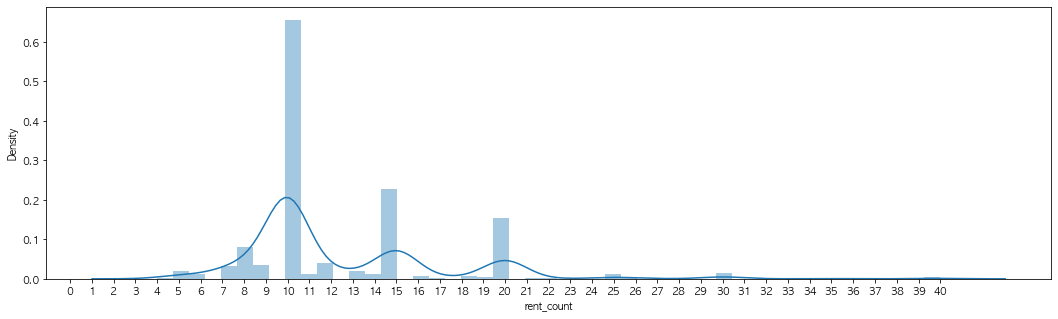

In [5]:
plt.figure(figsize=(18, 5))
sns.distplot(rent_office['rent_count'])
plt.xticks(range(0, 41))
plt.show()

In [6]:
rent_office['rent_count'].describe()

count    2467.000000
mean       12.417106
std         4.744904
min         4.000000
25%        10.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: rent_count, dtype: float64

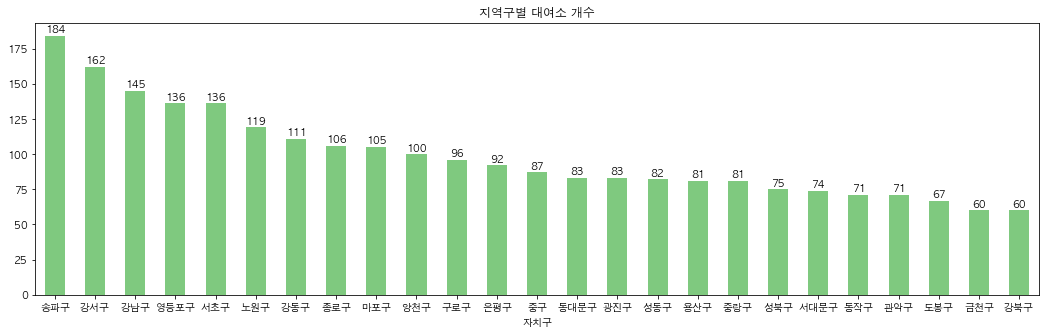

In [7]:
gu_bike_count = rent_office.groupby('자치구').size()


def count_draw(df, title):
    df.sort_values(ascending=False, inplace=True)
    ax = df.plot(kind='bar', figsize=(
        18, 5), rot=0, title=title, colormap='Accent')
    for p in ax.patches:
        left, bottom, width, height = p.get_bbox().bounds
        ax.annotate("%d" % (height), (left+width/2, height+2), ha='center')


count_draw(gu_bike_count, "지역구별 대여소 개수")


지역구에서 대여소가 많은 지역으로는 
1. 송파구
2. 강서구
3. 강남구
4. 영등포구, 서초구

순으로 나타남

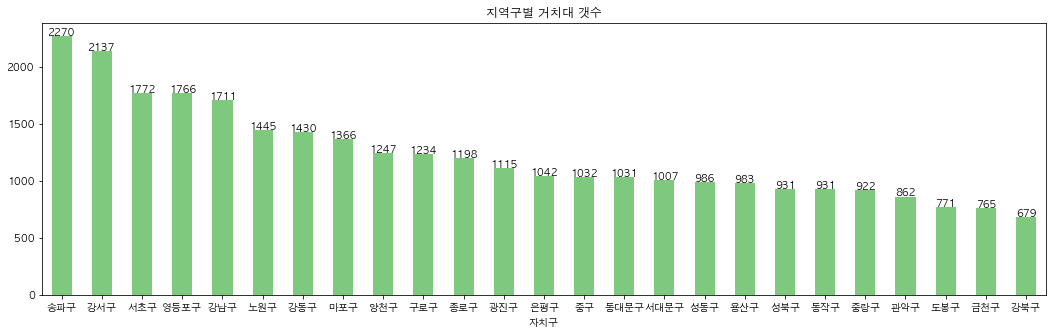

In [8]:
gu_rent_count = rent_office.groupby('자치구')['rent_count'].sum()

count_draw(gu_rent_count, "지역구별 거치대 갯수")

지역구별 거치대 갯수가 많은 순위
1. 송파구
2. 강서구
3. 서초구
4. 영등포구
5. 강남구

자치구
서대문구    13.608108
광진구     13.433735
강서구     13.191358
동작구     13.112676
서초구     13.029412
마포구     13.009524
영등포구    12.985294
강동구     12.882883
구로구     12.854167
금천구     12.750000
양천구     12.470000
동대문구    12.421687
성북구     12.413333
송파구     12.336957
노원구     12.142857
관악구     12.140845
용산구     12.135802
성동구     12.024390
중구      11.862069
강남구     11.800000
도봉구     11.507463
중랑구     11.382716
은평구     11.326087
강북구     11.316667
종로구     11.301887
dtype: float64


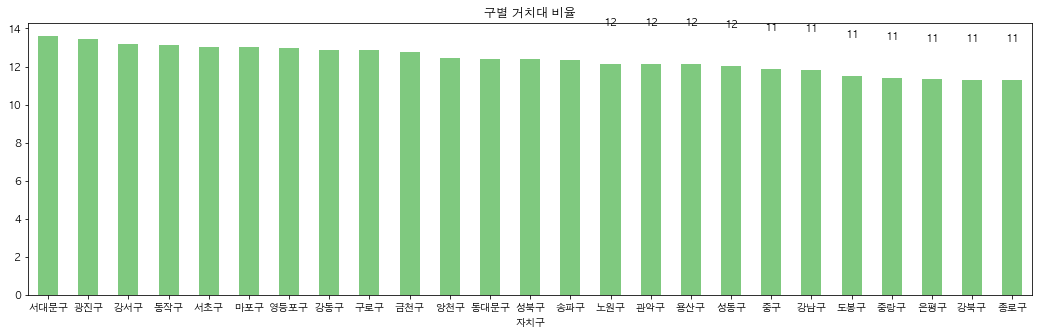

In [9]:
gu_percent_count = gu_rent_count / gu_bike_count

count_draw(gu_percent_count,"구별 거치대 비율")
print(gu_percent_count)

지역구별 대여소 당 평균 거치대 수
1. 서대문구
2. 광진구
3. 강서구
4. 동작구
5. 서초구 

==> 전체적으로 봤을때 강서구 중점적으로 기준 잡는게 좋을듯?

## 대여를 많이 한 지역
## 반납을 많이 한 지역

In [10]:
import csv
import pandas as pd
import glob

# get data file names
path = '../Data2/'
filenames = glob.glob(path + "*.csv")

dfs = []
for filename in filenames:
    print("starting...\n", filename)
    try:
        #print(pd.read_csv(filename, encoding='euc-kr').head())
        dfs.append(pd.read_csv(filename, encoding='euc-kr'))
    except:
        #print(pd.read_csv(filename, encoding='cp949').head())
        dfs.append(pd.read_csv(filename, encoding='cp949'))
    print("ending...\n", filename)


starting...
 ../Data2/공공자전거 대여이력 정보_2020.02.csv
ending...
 ../Data2/공공자전거 대여이력 정보_2020.02.csv
starting...
 ../Data2/공공자전거 대여이력 정보_2020.03.csv
ending...
 ../Data2/공공자전거 대여이력 정보_2020.03.csv
starting...
 ../Data2/공공자전거 대여이력 정보_2020.01.csv
ending...
 ../Data2/공공자전거 대여이력 정보_2020.01.csv
starting...
 ../Data2/공공자전거 대여이력 정보_2020.10.csv
ending...
 ../Data2/공공자전거 대여이력 정보_2020.10.csv
starting...
 ../Data2/공공자전거 대여이력 정보_2020.04.csv
ending...
 ../Data2/공공자전거 대여이력 정보_2020.04.csv
starting...
 ../Data2/공공자전거 대여이력 정보_2020.11.csv
ending...
 ../Data2/공공자전거 대여이력 정보_2020.11.csv
starting...
 ../Data2/공공자전거 대여이력 정보_2020.12.csv
ending...
 ../Data2/공공자전거 대여이력 정보_2020.12.csv
starting...
 ../Data2/공공자전거 대여이력 정보_2020.06.csv
ending...
 ../Data2/공공자전거 대여이력 정보_2020

In [11]:
big_frame = pd.concat(dfs, ignore_index=True)

In [12]:
big_frame.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-22727,2020-01-31 23:40:04,183,하늘채코오롱아파트 건너편,15,2020-02-01 00:00:02,00113,홍대입구역 2번출구 앞,10,19.0,2430.0
1,SPB-21546,2020-01-31 22:05:17,3106,홍남교 두바퀴쉼터,6,2020-02-01 00:00:06,03106,홍남교 두바퀴쉼터,7,105.0,860.0
2,SPB-24679,2020-01-31 23:55:01,1435,능산삼거리,8,2020-02-01 00:00:08,01430,중랑구청,19,4.0,720.0
3,SPB-20312,2020-01-31 23:54:06,1656,중앙하이츠 아파트 입구,2,2020-02-01 00:00:11,01625,상계역(4번출구),16,5.0,660.0
4,SPB-21946,2020-01-31 23:41:05,237,보라매 두산위브 건너편,1,2020-02-01 00:00:11,02169,봉천역 2번출구,6,19.0,2890.0


In [13]:
big_frame.shape

(36901873, 11)

In [14]:
big_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36901873 entries, 0 to 36901872
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     object 
 5   반납일시      object 
 6   반납대여소번호   object 
 7   반납대여소명    object 
 8   반납거치대     int64  
 9   이용시간      float64
 10  이용거리      float64
dtypes: float64(2), int64(2), object(7)
memory usage: 3.0+ GB


In [15]:
big_frame.isna().sum()

자전거번호         0
대여일시          0
대여 대여소번호      0
대여 대여소명       0
대여거치대         0
반납일시          0
반납대여소번호       0
반납대여소명        0
반납거치대         0
이용시간          0
이용거리        451
dtype: int64

In [16]:
big_frame.dropna(inplace=True)

In [17]:
#반납대여소번호 object -> int
#big_frame['반납대여소번호'] = big_frame['반납대여소번호'].astype('int64')
#str_list = big_frame['반납대여소번호'].unique()
#print(big_frame.shape)
#p = re.compile(r'[^0-9]+')

#condition = p.match(str(big_frame['반납대여소번호']))


#print(condition)
#print(int(big_frame['반납대여소번호'][0]))
big_frame['반납대여소번호'] = pd.to_numeric(big_frame['반납대여소번호'], errors='coerce')

#big_frame.drop(big_frame[condition].index, inplace=True)

#print(big_frame.shape)



#with open("반납대여소번호리스트.txt", "w") as file:
#    for value in str_list:
#        file.writelines(str(value))
#str_list


In [18]:
#big_frame['반납대여소번호'] = big_frame['반납대여소번호'].astype('int64')
big_frame['반납대여소번호'].value_counts()
print(big_frame['반납대여소번호'].shape)
big_frame['반납대여소번호'] = big_frame['반납대여소번호'].replace([np.inf, -np.inf], np.nan)
big_frame['반납대여소번호'] = big_frame['반납대여소번호'].replace(["NA","inf"], np.nan)
big_frame['반납대여소번호'].dropna(inplace=True)

print(big_frame['반납대여소번호'].shape)
#big_frame['반납대여소번호'] = big_frame['반납대여소번호'].astype('int')
test = big_frame['반납대여소번호'].tolist()
test

#with open("반납대여소번호리스트.txt", "w") as file:
#    for value in test:
#        file.writelines(str(value))
#        file.write("\n")



(36901422,)
(36901422,)


[113,
 3106,
 1430,
 1625,
 2169,
 371,
 586,
 3501,
 371,
 1914,
 2245,
 115,
 2372,
 1321,
 602,
 1655,
 663,
 1050,
 1601,
 2012,
 2615,
 1458,
 126,
 1901,
 2263,
 712,
 2111,
 634,
 362,
 244,
 175,
 739,
 1050,
 3513,
 2265,
 2217,
 2185,
 735,
 2105,
 565,
 1210,
 1366,
 300,
 415,
 2217,
 1686,
 641,
 1361,
 2217,
 3529,
 2396,
 121,
 244,
 950,
 2340,
 3509,
 1960,
 231,
 1436,
 1742,
 2356,
 739,
 3509,
 743,
 1666,
 585,
 2412,
 1805,
 1723,
 2412,
 155,
 280,
 131,
 505,
 593,
 3535,
 809,
 431,
 1713,
 1011,
 1925,
 900,
 504,
 593,
 1425,
 2235,
 573,
 1204,
 1113,
 907,
 2025,
 1416,
 286,
 3509,
 395,
 307,
 835,
 264,
 1050,
 1637,
 562,
 558,
 2314,
 1290,
 307,
 708,
 1024,
 2228,
 1209,
 1916,
 1222,
 3501,
 3504,
 1013,
 1734,
 2292,
 355,
 2060,
 760,
 154,
 154,
 250,
 593,
 361,
 614,
 1656,
 257,
 962,
 1011,
 151,
 150,
 1450,
 230,
 150,
 1110,
 1731,
 708,
 130,
 832,
 514,
 845,
 828,
 164,
 402,
 1653,
 932,
 1171,
 502,
 539,
 439,
 156,
 1131,
 289,
 292

In [19]:
big_frame['반납대여소번호'] = big_frame['반납대여소번호'].astype('int')

In [20]:
big_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36901422 entries, 0 to 36901872
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     object 
 5   반납일시      object 
 6   반납대여소번호   int64  
 7   반납대여소명    object 
 8   반납거치대     int64  
 9   이용시간      float64
 10  이용거리      float64
dtypes: float64(2), int64(3), object(6)
memory usage: 3.3+ GB


In [21]:
database = rent_office[['대여소번호','자치구']]
database

,대여소번호,자치구
0,102,마포구
1,103,마포구
2,104,마포구
3,105,마포구
4,106,마포구
...,...,...
2462,4864,송파구
2463,4865,송파구
2464,4867,송파구
2465,4868,송파구


In [22]:
db1 = database.rename(columns={'대여소번호':'대여 대여소번호','자치구':'대여 자치구'})

In [23]:
rent_df = pd.merge(big_frame, db1,
                   left_on='대여 대여소번호', right_on='대여 대여소번호', how='inner')
rent_df.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,대여 자치구
0,SPB-22727,2020-01-31 23:40:04,183,하늘채코오롱아파트 건너편,15,2020-02-01 00:00:02,113,홍대입구역 2번출구 앞,10,19.0,2430.0,마포구
1,SPB-19680,2020-02-01 00:49:15,183,하늘채코오롱아파트 건너편,1,2020-02-01 02:10:34,183,하늘채코오롱아파트 건너편,3,75.0,13550.0,마포구
2,SPB-09801,2020-02-01 02:18:49,183,하늘채코오롱아파트 건너편,7,2020-02-01 02:28:16,155,가좌역1 번출구 뒤,7,9.0,610.0,마포구
3,SPB-25172,2020-02-01 02:53:29,183,하늘채코오롱아파트 건너편,1,2020-02-01 03:04:45,152,마포구민체육센터 앞,6,10.0,2560.0,마포구
4,SPB-24455,2020-02-01 06:23:35,183,하늘채코오롱아파트 건너편,15,2020-02-01 06:34:40,102,망원역 1번출구 앞,2,10.0,1850.0,마포구


In [24]:
#rent_df.drop('대여소번호', axis=1, inplace=True)

In [75]:
#rent_df.rename(columns={"자치구": "대여 자치구"}, inplace=True)
rent_df.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,대여 자치구,반납자치구,대여일,대여요일,대여시간,반납시간,대여연도,대여월
0,SPB-22727,2020-01-31 23:40:04,183,하늘채코오롱아파트 건너편,15,2020-02-01 00:00:02,113,홍대입구역 2번출구 앞,10,19.0,2430.0,마포구,마포구,31,4,23,0,2020,1
1,SPB-20753,2020-02-01 06:45:29,183,하늘채코오롱아파트 건너편,1,2020-02-01 06:50:26,113,홍대입구역 2번출구 앞,18,4.0,1030.0,마포구,마포구,1,5,6,6,2020,2
2,SPB-15314,2020-02-01 08:42:16,183,하늘채코오롱아파트 건너편,4,2020-02-01 08:47:28,113,홍대입구역 2번출구 앞,16,4.0,1220.0,마포구,마포구,1,5,8,8,2020,2
3,SPB-18500,2020-02-01 08:40:33,183,하늘채코오롱아파트 건너편,15,2020-02-01 08:49:43,113,홍대입구역 2번출구 앞,18,8.0,1190.0,마포구,마포구,1,5,8,8,2020,2
4,SPB-12031,2020-02-01 09:04:21,183,하늘채코오롱아파트 건너편,11,2020-02-01 09:10:36,113,홍대입구역 2번출구 앞,7,5.0,1080.0,마포구,마포구,1,5,9,9,2020,2


In [28]:
db2 = database.rename(columns={"대여소번호":"반납대여소번호","자치구":"반납자치구"})
db2

,반납대여소번호,반납자치구
0,102,마포구
1,103,마포구
2,104,마포구
3,105,마포구
4,106,마포구
...,...,...
2462,4864,송파구
2463,4865,송파구
2464,4867,송파구
2465,4868,송파구


In [29]:
rent_df = pd.merge(rent_df, db2,
                   left_on='반납대여소번호', right_on='반납대여소번호', how='inner')
rent_df.head()


,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,대여 자치구,반납자치구
0,SPB-22727,2020-01-31 23:40:04,183,하늘채코오롱아파트 건너편,15,2020-02-01 00:00:02,113,홍대입구역 2번출구 앞,10,19.0,2430.0,마포구,마포구
1,SPB-20753,2020-02-01 06:45:29,183,하늘채코오롱아파트 건너편,1,2020-02-01 06:50:26,113,홍대입구역 2번출구 앞,18,4.0,1030.0,마포구,마포구
2,SPB-15314,2020-02-01 08:42:16,183,하늘채코오롱아파트 건너편,4,2020-02-01 08:47:28,113,홍대입구역 2번출구 앞,16,4.0,1220.0,마포구,마포구
3,SPB-18500,2020-02-01 08:40:33,183,하늘채코오롱아파트 건너편,15,2020-02-01 08:49:43,113,홍대입구역 2번출구 앞,18,8.0,1190.0,마포구,마포구
4,SPB-12031,2020-02-01 09:04:21,183,하늘채코오롱아파트 건너편,11,2020-02-01 09:10:36,113,홍대입구역 2번출구 앞,7,5.0,1080.0,마포구,마포구


In [34]:
rent_df['대여일시'] = pd.to_datetime(rent_df['대여일시'])
rent_df['반납일시'] = pd.to_datetime(rent_df['반납일시'])
rent_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 36399546 entries, 0 to 36399545
Data columns (total 13 columns):
 #   Column    Dtype         
---  ------    -----         
 0   자전거번호     object        
 1   대여일시      datetime64[ns]
 2   대여 대여소번호  int64         
 3   대여 대여소명   object        
 4   대여거치대     object        
 5   반납일시      datetime64[ns]
 6   반납대여소번호   int64         
 7   반납대여소명    object        
 8   반납거치대     int64         
 9   이용시간      float64       
 10  이용거리      float64       
 11  대여 자치구    object        
 12  반납자치구     object        
dtypes: datetime64[ns](2), float64(2), int64(3), object(6)
memory usage: 3.8+ GB


In [38]:
#rent_df['대여일시'].dt.day
rent_df['대여일'] = rent_df['대여일시'].dt.day
rent_df['대여요일'] = rent_df['대여일시'].dt.dayofweek
#rent_df['대여일시'].dt.dayofweek
rent_df['대여시간'] = rent_df['대여일시'].dt.hour
rent_df['반납시간'] = rent_df['반납일시'].dt.hour

rent_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36399546 entries, 0 to 36399545
Data columns (total 17 columns):
 #   Column    Dtype         
---  ------    -----         
 0   자전거번호     object        
 1   대여일시      datetime64[ns]
 2   대여 대여소번호  int64         
 3   대여 대여소명   object        
 4   대여거치대     object        
 5   반납일시      datetime64[ns]
 6   반납대여소번호   int64         
 7   반납대여소명    object        
 8   반납거치대     int64         
 9   이용시간      float64       
 10  이용거리      float64       
 11  대여 자치구    object        
 12  반납자치구     object        
 13  대여일       int64         
 14  대여요일      int64         
 15  대여시간      int64         
 16  반납시간      int64         
dtypes: datetime64[ns](2), float64(2), int64(7), object(6)
memory usage: 4.9+ GB


대여요일
0    5104680
1    5333672
2    5490060
3    5280307
4    5438195
5    4902717
6    4849915
dtype: int64

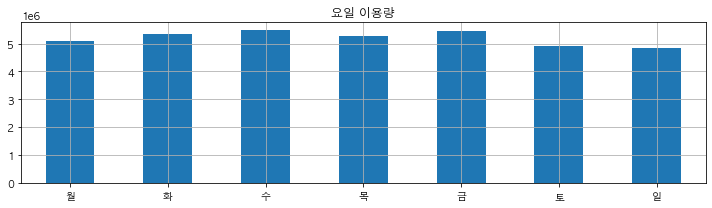

In [44]:
rent_day = rent_df.groupby('대여요일').size()
display(rent_day)
rent_day.index = "월 화 수 목 금 토 일".split()
rent_day.plot(kind='bar', figsize=(10, 3), rot=0, title="요일 이용량")
plt.tight_layout()
plt.grid()
plt.show()


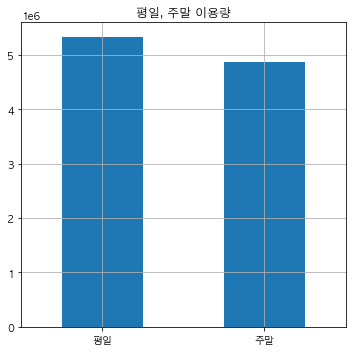

0.9149870037483515


In [52]:
weekday = rent_day.loc["월 화 수 목 금".split()].mean()
weekend = rent_day.loc["토 일".split()].mean()

pd.Series(data=[weekday,weekend], index=["평일", "주말"]).plot(kind='bar', figsize=(5, 5), rot=0, title="평일, 주말 이용량")
plt.tight_layout()
plt.grid()
plt.show()
print(weekend/weekday) # 주말이 평일에 비해 91% 정도.

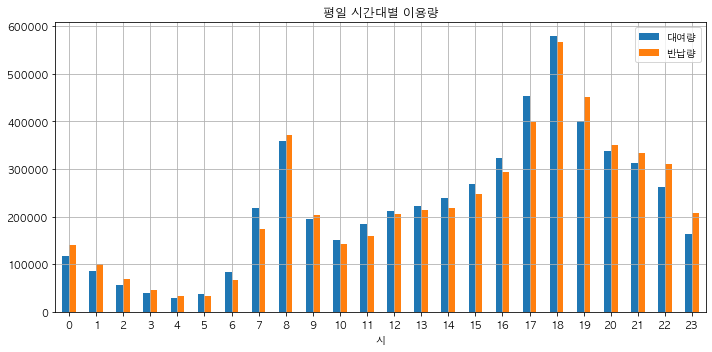

In [59]:
pd.DataFrame(data={
    "대여량": rent_df[rent_df['대여요일'].isin(set(range(0, 5)))].groupby('대여시간').size()//5,
    "반납량": rent_df[rent_df['대여요일'].isin(set(range(0, 5)))].groupby('반납시간').size()//5
}).plot(kind='bar', figsize=(10, 5), rot=0, title="평일 시간대별 이용량")
plt.xlabel("시")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


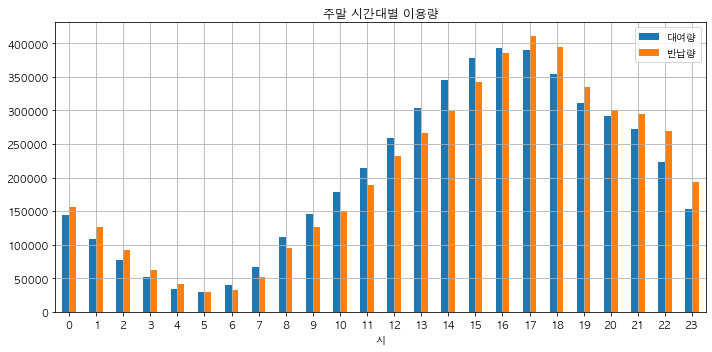

In [58]:
pd.DataFrame(data={
    "대여량": rent_df[rent_df['대여요일'].isin(set(range(5, 7)))].groupby('대여시간').size()//2,
    "반납량": rent_df[rent_df['대여요일'].isin(set(range(5, 7)))].groupby('반납시간').size()//2
}).plot(kind='bar', figsize=(10, 5), rot=0, title="주말 시간대별 이용량")
plt.xlabel("시")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

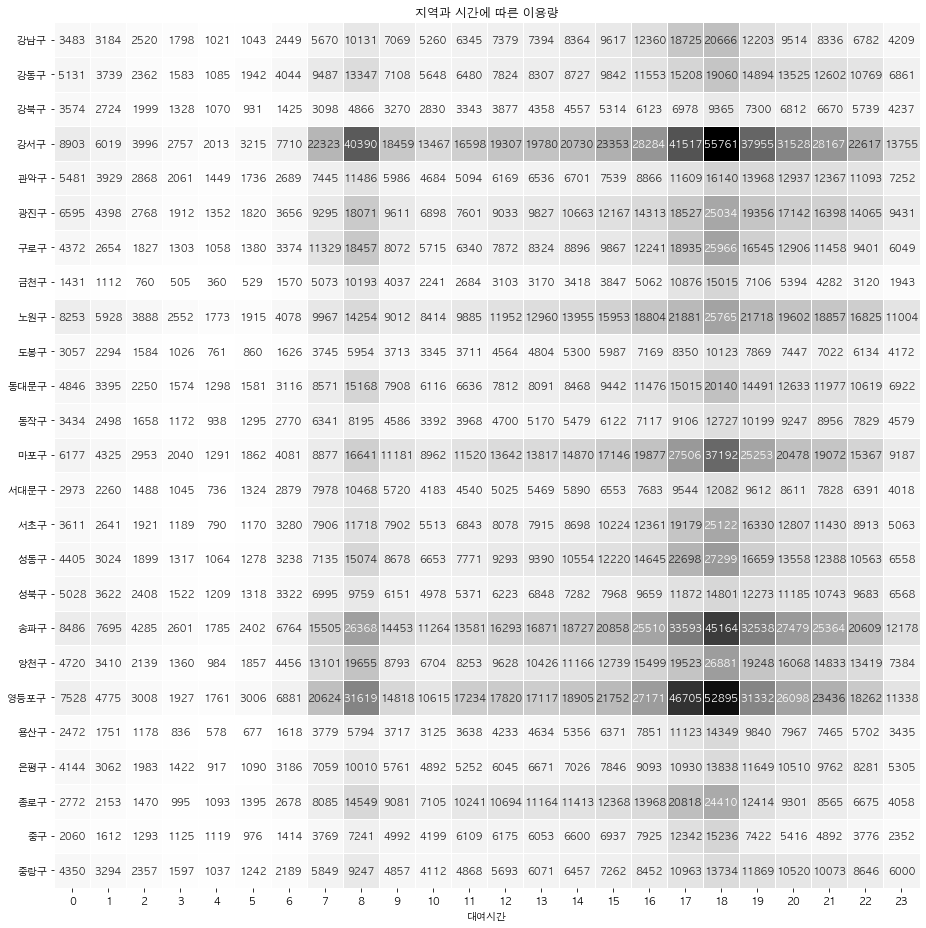

In [73]:
heat_table1 = (rent_df[rent_df['대여요일'].isin(set(range(0, 5)))].groupby(
    ['대여 자치구', '대여시간']).size()//5).unstack()

plt.figure(figsize=(13,13))
sns.heatmap(heat_table1, annot=True, fmt='d',
            cmap="Greys", cbar=False, linewidth=1)
plt.title("지역과 시간에 따른 이용량")
plt.ylabel("")
plt.tight_layout()
plt.show()


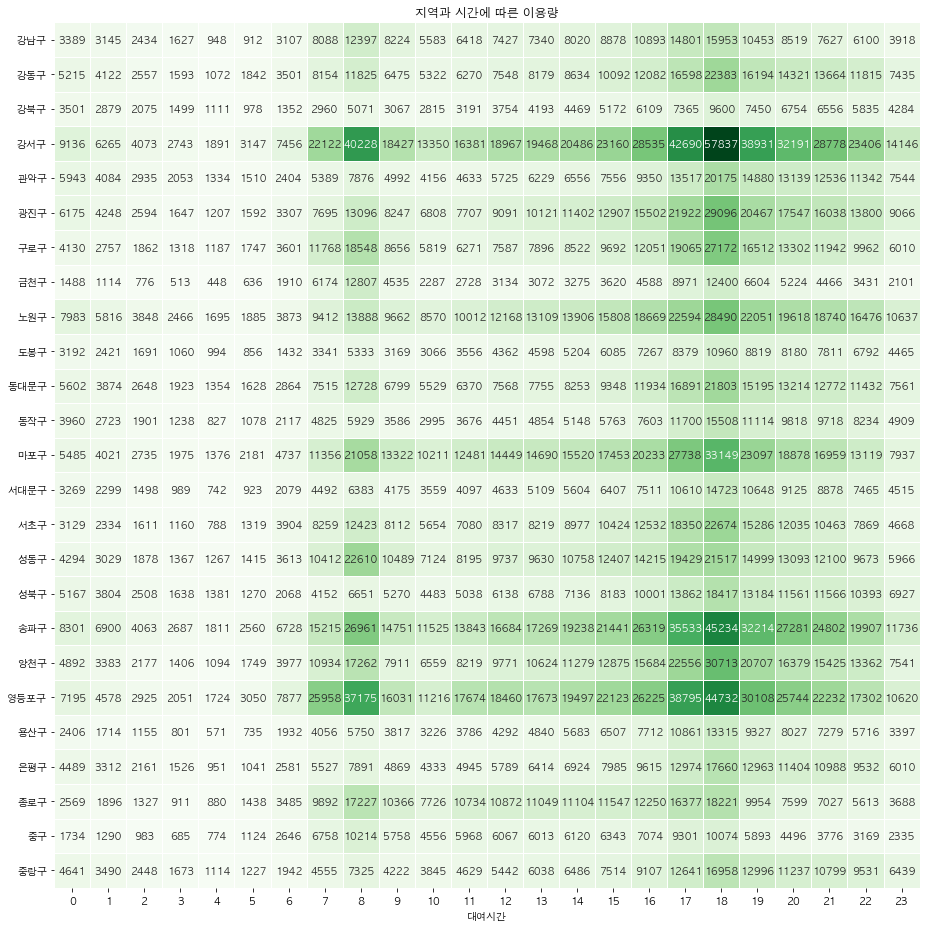

In [74]:
heat_table2 = (rent_df[rent_df['대여요일'].isin(set(range(0, 5)))].groupby(
    ['반납자치구', '대여시간']).size()//5).unstack()

plt.figure(figsize=(13, 13))
sns.heatmap(heat_table2, annot=True, fmt='d',
            cmap="Greens", cbar=False, linewidth=1)
plt.title("지역과 시간에 따른 이용량")
plt.ylabel("")
plt.tight_layout()
plt.show()


In [67]:
rent_df['대여연도'] = rent_df['대여일시'].dt.year
rent_df['대여월'] = rent_df['대여일시'].dt.month
rent_df.tail()



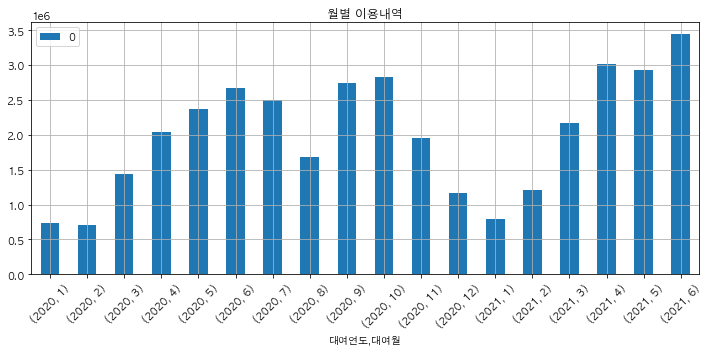

In [72]:
time_rent = rent_df.groupby(['대여연도','대여월']).size()
pd.DataFrame(data=time_rent).plot(
    kind='bar', figsize=(10, 5), rot=0, title="월별 이용내역")

plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [95]:
#대여 번호별 대여거치대 수량?

#rent_office.columns

gangseo_office = rent_office[rent_office['자치구'] == '강서구']['대여소번호']
#rent_gangseo = rent_df[rent_df['대여 대여소번호'].isin(gangseo_office)]
#rent_gangseo.head()

In [85]:
#rent_gangseo.shape

(3245497, 19)

In [87]:
#rent_gangseo['대여 대여소명'].value_counts()

발산역 1번, 9번 인근 대여소             90911
양천향교역 7번출구앞                   84864
마곡나루역 5번출구 뒤편                 83997
가양역 8번출구                      78065
마곡나루역 2번 출구                   69030
                              ...  
?轢볍溜浩존?텔아파트                       1
염창동 한마음아파트앞(염창??빛나는 음악학원앞)        1
염?℉?한마음아파트앞(염창동 빛나는 음악학원앞)        1
발산역 6?萍瘦맙?다이소앞)                   1
마곡?斌」黴?앞                          1
Name: 대여 대여소명, Length: 205, dtype: int64

In [90]:

# get data file names
path = '../Time_rent/'
filenames = glob.glob(path + "*.csv")

print(filenames)

dfs = []
for filename in filenames:
    print("starting...\n", filename)
    try:
        #print(pd.read_csv(filename, encoding='euc-kr').head())
        dfs.append(pd.read_csv(filename, encoding='euc-kr'))
    except:
        #print(pd.read_csv(filename, encoding='cp949').head())
        dfs.append(pd.read_csv(filename, encoding='cp949'))
    print("ending...\n", filename)


['../Time_rent/공공자전거 이용정보(시간대별)_21.01.csv', '../Time_rent/공공자전거 이용정보(시간대별)_20.09.csv', '../Time_rent/공공자전거 이용정보(시간대별)_20.08.csv', '../Time_rent/공공자전거 이용정보(시간대별)_20.11.csv', '../Time_rent/공공자전거 이용정보(시간대별)_20.10.csv', '../Time_rent/공공자전거 이용정보(시간대별)_20.12.csv', '../Time_rent/공공자전거 이용정보(시간대별)_20.06.csv', '../Time_rent/공공자전거 이용정보(시간대별)_20.07.csv']
starting...
 ../Time_rent/공공자전거 이용정보(시간대별)_21.01.csv
ending...
 ../Time_rent/공공자전거 이용정보(시간대별)_21.01.csv
starting...
 ../Time_rent/공공자전거 이용정보(시간대별)_20.09.csv
ending...
 ../Time_rent/공공자전거 이용정보(시간대별)_20.09.csv
starting...
 ../Time_rent/공공자전거 이용정보(시간대별)_20.08.csv
ending...
 ../Time_rent/공공자전거 이용정보(시간대별)_20.08.csv
starting...
 ../Time_rent/공공자전거 이용정보(시간대별)_

In [91]:
# Concatenate all data into one DataFrame
use_per_time_df = pd.concat(dfs, ignore_index=True)

In [92]:
use_per_time_df.head()


,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5


In [93]:
use_per_time_df.describe()


,대여시간,대여소번호,이용건수,이동거리,사용시간
count,1.362698e+07,1.362698e+07,1.362698e+07,1.362698e+07,1.362698e+07
mean,1.416080e+01,1.371831e+03,1.210819e+00,2.491977e+03,3.570783e+01
std,6.021043e+00,9.443941e+02,6.221118e-01,1.229316e+05,4.268705e+01
min,0.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+01,5.930000e+02,1.000000e+00,0.000000e+00,1.000000e+01
50%,1.500000e+01,1.211000e+03,1.000000e+00,0.000000e+00,2.100000e+01
75%,1.900000e+01,2.016000e+03,1.000000e+00,0.000000e+00,4.700000e+01
max,2.300000e+01,9.999900e+04,5.300000e+01,3.954919e+07,3.446000e+03


In [94]:
use_per_time_df.shape


(13626982, 12)

In [96]:
use_per_time_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13626982 entries, 0 to 13626981
Data columns (total 12 columns):
 #   Column  Dtype  
---  ------  -----  
 0   대여일자    object 
 1   대여시간    int64  
 2   대여소번호   int64  
 3   대여소명    object 
 4   대여구분코드  object 
 5   성별      object 
 6   연령대코드   object 
 7   이용건수    int64  
 8   운동량     object 
 9   탄소량     object 
 10  이동거리    float64
 11  사용시간    int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 1.2+ GB


In [116]:
use_per_time_df = use_per_time_df.merge(
    rent_office[['대여소번호', 'rent_count']], on='대여소번호')


In [117]:
use_per_time_df['대여일자'] = pd.to_datetime(use_per_time_df['대여일자'])

In [118]:
use_per_time_df['대여일'] = use_per_time_df['대여일자'].dt.day
use_per_time_df['대여월'] = use_per_time_df['대여일자'].dt.month
use_per_time_df['대여요일'] = use_per_time_df['대여일자'].dt.dayofweek
use_per_time_df.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,대여일,대여요일,대여월,rent_count
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13,1,4,1,20.0
1,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,20대,1,11.24,0.07,283.72,1,1,4,1,20.0
2,2021-01-01,2,1347,1347. 길음래미안아파트817동 상가 앞,일일권,NaN,20대,1,42.24,0.43,1839.04,37,1,4,1,20.0
3,2021-01-01,2,1347,1347. 길음래미안아파트817동 상가 앞,일일권,M,20대,2,50.75,0.44,1912.72,73,1,4,1,20.0
4,2021-01-01,5,1347,1347. 길음래미안아파트817동 상가 앞,일일권,M,~10대,1,183.65,1.66,7134.79,47,1,4,1,20.0


In [144]:
test_time = datetime.datetime(2021,1,1)

train_df = use_per_time_df[use_per_time_df['대여일자'] < test_time] 

In [145]:
rent_gangseo = train_df[train_df['대여소번호'].isin(gangseo_office)]


In [146]:
rent_gangseo.shape

(1097313, 16)

In [147]:
rent_gangseo['대여소명'].value_counts()

1153. 발산역 1번, 9번 인근 대여소    26423
1160. 양천향교역 7번출구앞          24980
1158. 가양역 8번출구             23272
1149. 신방화역환승주차장            21430
2715.마곡나루역 2번 출구           20845
                           ...  
3788. 정곡나들목                    5
3753. 공항중학교 버스정류장              4
3761. 나이아가라관광호텔                4
3765. 문소빌딩                     3
3776. 김포공항교차로                  2
Name: 대여소명, Length: 142, dtype: int64

In [174]:
gangseo = rent_gangseo.groupby(['대여시간','대여월','대여일','대여요일','rent_count'])['이동거리','사용시간','이용건수'].agg({'이동거리':'mean','사용시간':'mean','이용건수':'sum'}).reset_index()

In [175]:
gangseo.shape


(56943, 8)

<AxesSubplot:>

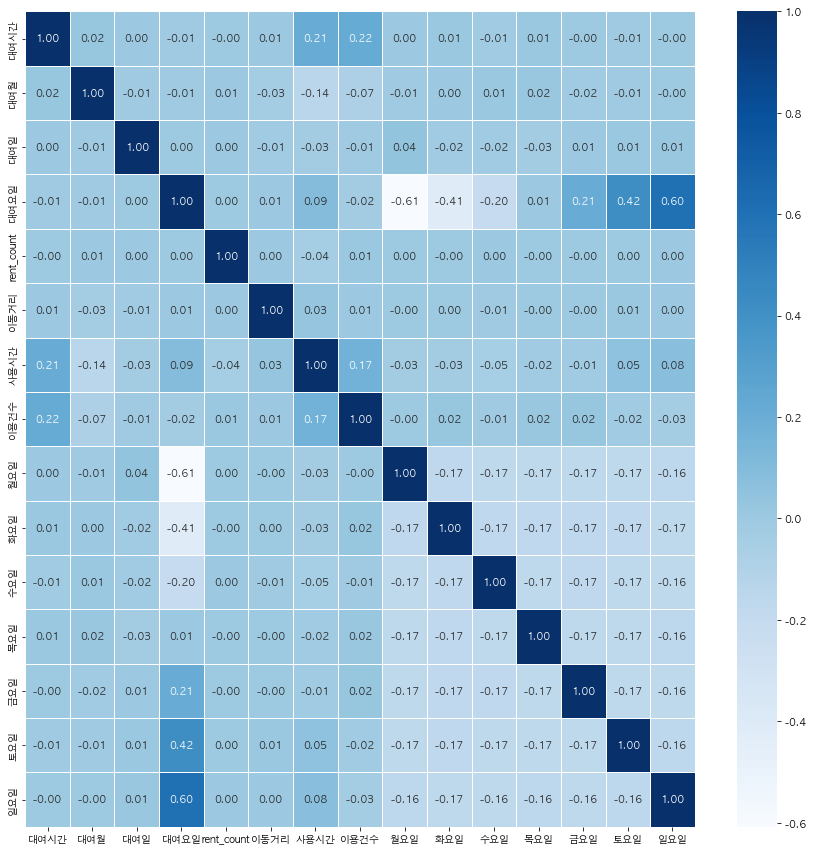

In [249]:
plt.figure(figsize=(15, 15))
sns.heatmap(data=gangseo.corr(), annot=True,
            fmt='.2f', linewidths=.5, cmap='Blues')


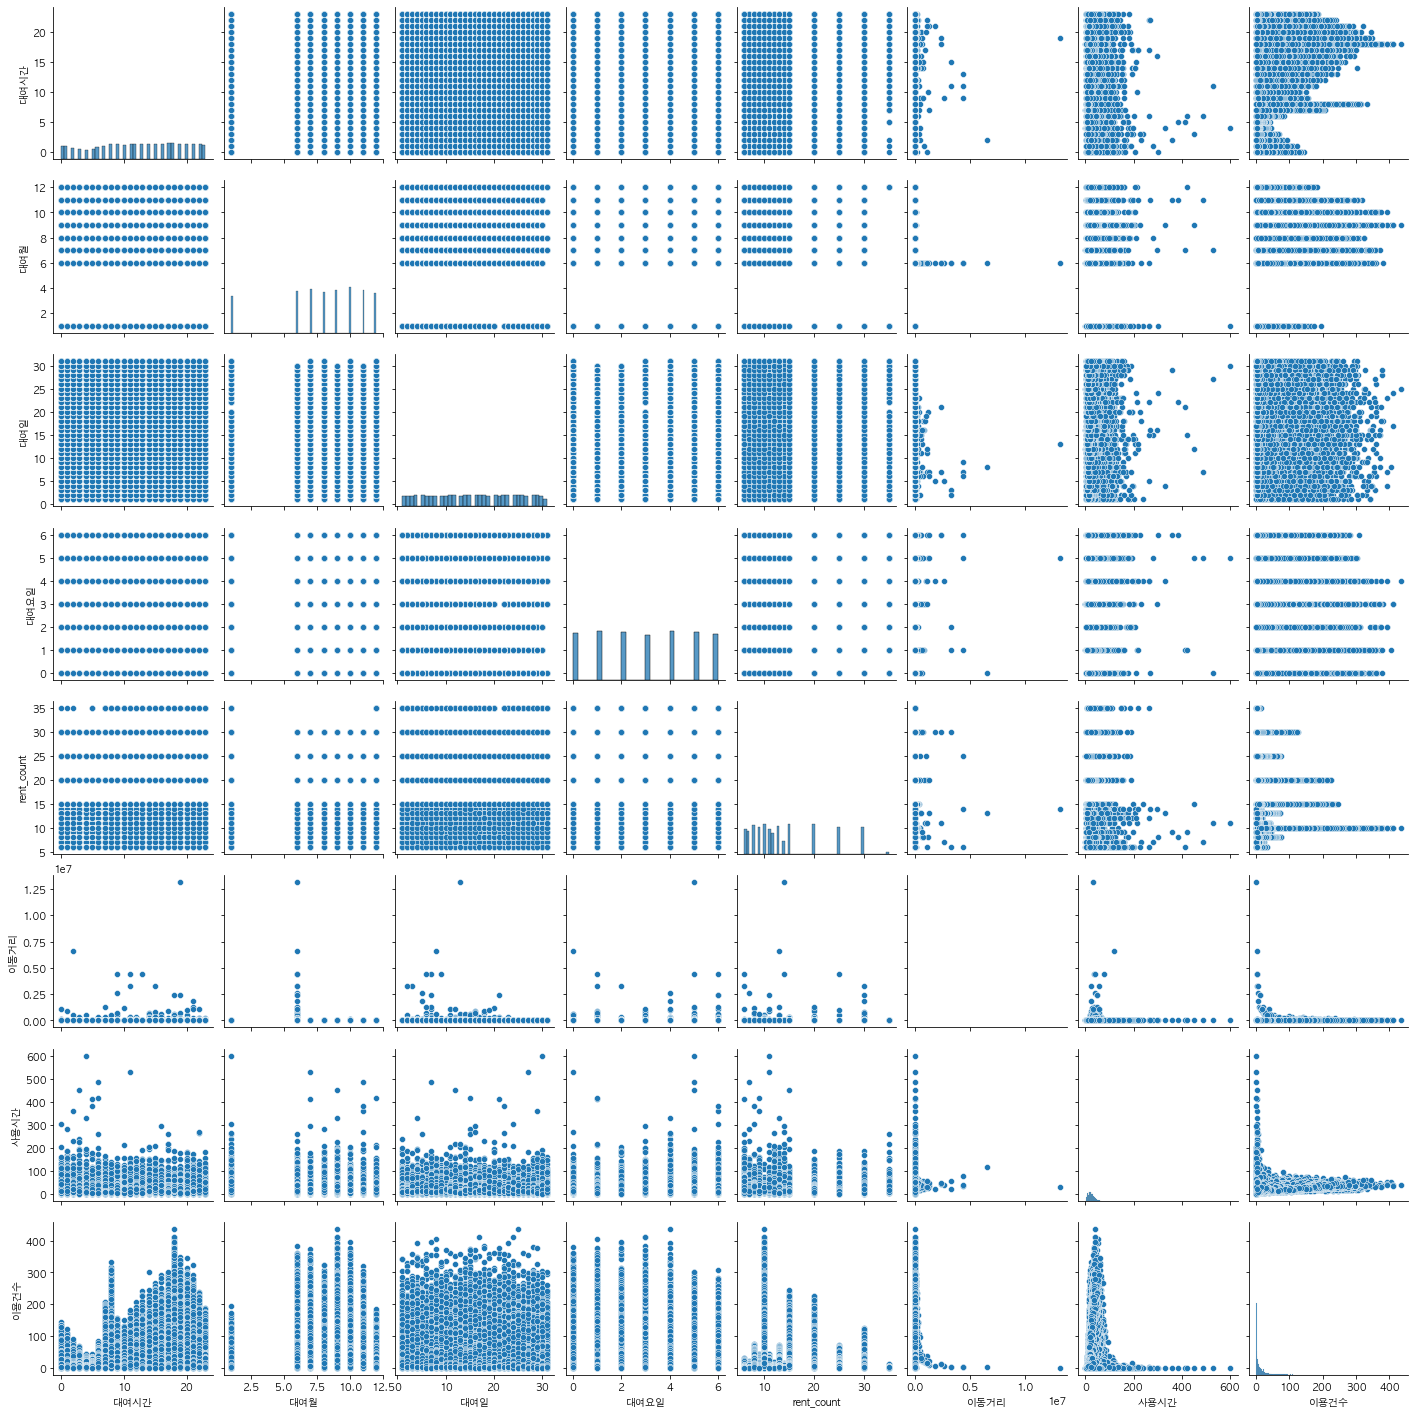

In [131]:
sns.pairplot(gangseo)
plt.show()


In [219]:
gangseo.columns

Index(['대여시간', '대여월', '대여일', '대여요일', 'rent_count', '이동거리', '사용시간', '이용건수',
       '월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일'],
      dtype='object')

In [220]:
target = '이용건수'
feature = gangseo.loc[:,~gangseo.columns.isin([target])].columns

In [221]:
feature

Index(['대여시간', '대여월', '대여일', '대여요일', 'rent_count', '이동거리', '사용시간', '월요일',
       '화요일', '수요일', '목요일', '금요일', '토요일', '일요일'],
      dtype='object')

In [222]:
#X_train, X_test, y_train, y_test = train_test_split(
#    hongdae[features], hongdae['이용건수'], test_size=0.2, random_state=42)

gangseo.head()


,대여시간,대여월,대여일,대여요일,rent_count,이동거리,사용시간,이용건수,월요일,화요일,수요일,목요일,금요일,토요일,일요일
0,0,6,1,0,6.0,0.000000,6.000000,1,1,0,0,0,0,0,0
1,0,6,1,0,7.0,0.000000,6.000000,1,1,0,0,0,0,0,0
2,0,6,1,0,8.0,293.333333,15.166667,6,1,0,0,0,0,0,0
3,0,6,1,0,9.0,0.000000,68.000000,1,1,0,0,0,0,0,0
4,0,6,1,0,10.0,2157.058824,14.529412,36,1,0,0,0,0,0,0


In [154]:
gangseo.shape

(56943, 8)

In [155]:
use_per_time_df.shape

(13502573, 16)

In [156]:
train_df.shape

(12788134, 16)

In [180]:
gangseo['대여요일'] = gangseo['대여요일'].astype('int')

In [181]:
gangseo = gangseo.join(pd.get_dummies(gangseo['대여요일'], prefix="요일"))
gangseo.head()


,대여시간,대여월,대여일,대여요일,rent_count,이동거리,사용시간,이용건수,요일_0,요일_1,요일_2,요일_3,요일_4,요일_5,요일_6
0,0,6,1,0,6.0,0.000000,6.000000,1,1,0,0,0,0,0,0
1,0,6,1,0,7.0,0.000000,6.000000,1,1,0,0,0,0,0,0
2,0,6,1,0,8.0,293.333333,15.166667,6,1,0,0,0,0,0,0
3,0,6,1,0,9.0,0.000000,68.000000,1,1,0,0,0,0,0,0
4,0,6,1,0,10.0,2157.058824,14.529412,36,1,0,0,0,0,0,0


In [223]:
gangseo.rename(columns={'요일_0':'월요일','요일_1':'화요일','요일_2':'수요일','요일_3':'목요일','요일_4':'금요일','요일_5':'토요일','요일_6':'일요일'}, inplace=True)

In [224]:
gangseo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56943 entries, 0 to 56942
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   대여시간        56943 non-null  int64  
 1   대여월         56943 non-null  int64  
 2   대여일         56943 non-null  int64  
 3   대여요일        56943 non-null  int64  
 4   rent_count  56943 non-null  float64
 5   이동거리        56943 non-null  float64
 6   사용시간        56943 non-null  float64
 7   이용건수        56943 non-null  int64  
 8   월요일         56943 non-null  uint8  
 9   화요일         56943 non-null  uint8  
 10  수요일         56943 non-null  uint8  
 11  목요일         56943 non-null  uint8  
 12  금요일         56943 non-null  uint8  
 13  토요일         56943 non-null  uint8  
 14  일요일         56943 non-null  uint8  
dtypes: float64(3), int64(5), uint8(7)
memory usage: 3.9 MB


In [225]:
feature = gangseo.loc[:,~gangseo.columns.isin([target])].columns
feature

Index(['대여시간', '대여월', '대여일', '대여요일', 'rent_count', '이동거리', '사용시간', '월요일',
       '화요일', '수요일', '목요일', '금요일', '토요일', '일요일'],
      dtype='object')

In [226]:
train = gangseo[gangseo['대여월'] < 11]
test = gangseo[gangseo['대여월'] >= 11]


In [227]:
train.shape, test.shape

((41129, 15), (15814, 15))

In [228]:
train.head()

,대여시간,대여월,대여일,대여요일,rent_count,이동거리,사용시간,이용건수,월요일,화요일,수요일,목요일,금요일,토요일,일요일
0,0,6,1,0,6.0,0.000000,6.000000,1,1,0,0,0,0,0,0
1,0,6,1,0,7.0,0.000000,6.000000,1,1,0,0,0,0,0,0
2,0,6,1,0,8.0,293.333333,15.166667,6,1,0,0,0,0,0,0
3,0,6,1,0,9.0,0.000000,68.000000,1,1,0,0,0,0,0,0
4,0,6,1,0,10.0,2157.058824,14.529412,36,1,0,0,0,0,0,0


In [229]:
X_train, y_train = train[feature], train[target]
X_test, y_test = test[feature], test[target]

In [202]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model as lm
import xgboost as xgb
from scipy.stats import uniform, randint

models = [
    ('lr', lm.LinearRegression(n_jobs=-1)),
    ('ridge', lm.Ridge()),
    ('lasso', lm.Lasso()),
    ('LogisticRegression', lm.LogisticRegression()),
    ('xgboost', xgb.XGBRegressor())
]
n = 3
params = {
    'lr': {
        'fit_intercept': [True, False],
        'normalize': [True, False],
    },
    'ridge': {
        'alpha': [0.1, 1.0, 10, 100],
        'fit_intercept': [True, False],
        'normalize': [True, False],
    },
    'lasso': {
        'alpha': [0.1, 1.0, 10],
        'fit_intercept': [True, False],
        'normalize': [True, False],
    },
    'LogisticRegression': {
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1.0, 10],
        'fit_intercept': [True, False],
    },
    'xgboost': {
        "gamma": uniform(0, 0.5).rvs(n),
        "max_depth": range(2, 4),  # default 3
        "n_estimators": randint(100, 150).rvs(n),  # default 100
    }
}

best_model, best_mae = None, float('inf')
for model_name, model in models:
    param_grid = params[model_name]
    grid = GridSearchCV(model, cv=3, n_jobs=-1, param_grid=param_grid)
    grid = grid.fit(X_train, y_train)

    model = grid.best_estimator_
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)

    print(model_name, mae)

    if mae < best_mae:
        best_model = model


/Users/Markers/.pyenv/versions/3.8.3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/Markers/.pyenv/versions/3.8.3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sk

lr 23.111111468889817


/Users/Markers/.pyenv/versions/3.8.3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/Users/Markers/.pyenv/versions/3.8.3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To 

ridge 23.709168222940725


/Users/Markers/.pyenv/versions/3.8.3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/Users/Markers/.pyenv/versions/3.8.3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing s

lasso 22.69964078016409


/Users/Markers/.pyenv/versions/3.8.3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Markers/.pyenv/versions/3.8.3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

LogisticRegression 16.880548880738587
xgboost 15.790086635187375


In [203]:
best_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.12294492215005653, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=109, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [205]:
mae

15.790086635187375

In [230]:
##xboost 다시.
models = [
    ('xgboost', xgb.XGBRegressor())
]

params = {
    'xgboost': {
        "gamma": uniform(0, 0.5).rvs(n),
        "max_depth": range(2, 4),  # default 3
        "n_estimators": randint(100, 150).rvs(n),  # default 100
    }
}

parmas = { "gamma": uniform(0, 0.5).rvs(n),
            "max_depth": range(2, 4),  # default 3
            "n_estimators": randint(100, 150).rvs(n)
            }

best_model, best_mae = None, float('inf')
for model_name, model in models:
    param_grid = params[model_name]
    grid = GridSearchCV(model, cv=3, n_jobs=-1, param_grid=param_grid)
    grid = grid.fit(X_train, y_train)

    model = grid.best_estimator_
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)

    print(model_name, mae)

    if mae < best_mae:
        best_model = model


xgboost 15.609256312989835


In [231]:
best_model.feature_importances_

array([0.10414584, 0.05460513, 0.0204895 , 0.02300666, 0.33151904,
       0.25949943, 0.18182719, 0.        , 0.00717712, 0.0098068 ,
       0.        , 0.00792346, 0.        , 0.        ], dtype=float32)

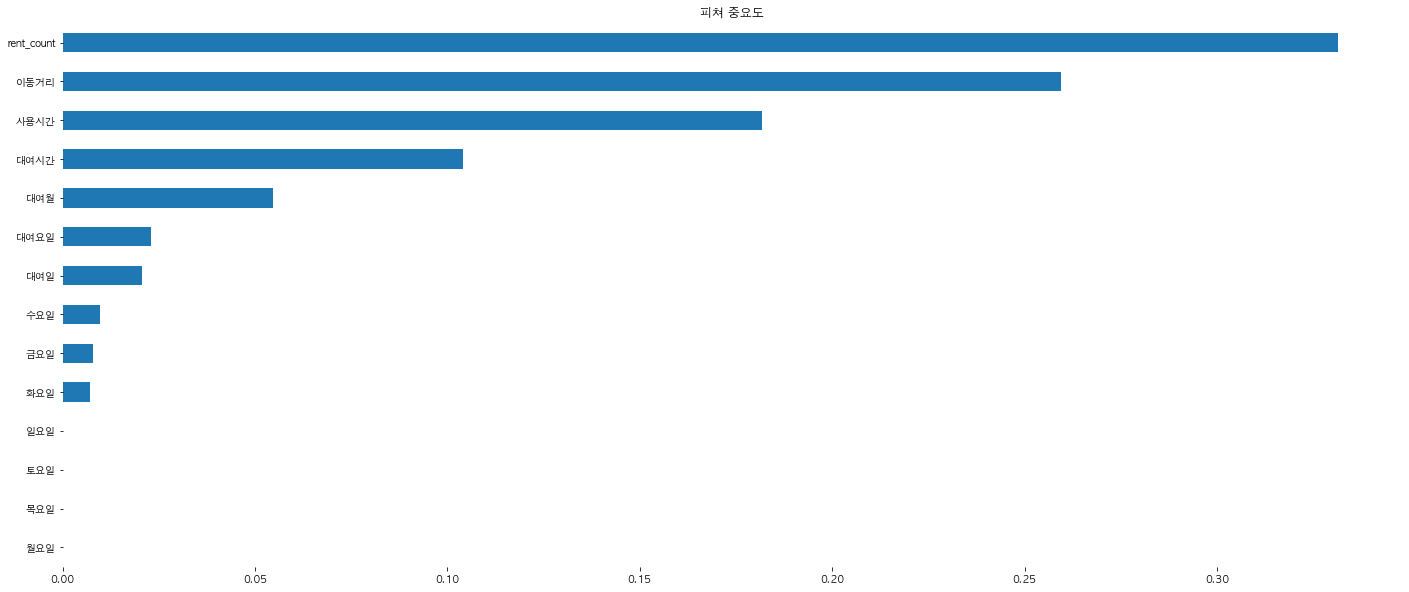

In [232]:
feature_importance = pd.Series(
    index=feature, data=best_model.feature_importances_).sort_values()
feature_importance.plot(kind='barh', figsize=(24, 10), title="피쳐 중요도", rot=0)
plt.box(False)
plt.show()


In [208]:
feature

Index(['대여시간', '대여월', '대여일', '대여요일', 'rent_count', '이동거리', '사용시간'], dtype='object')

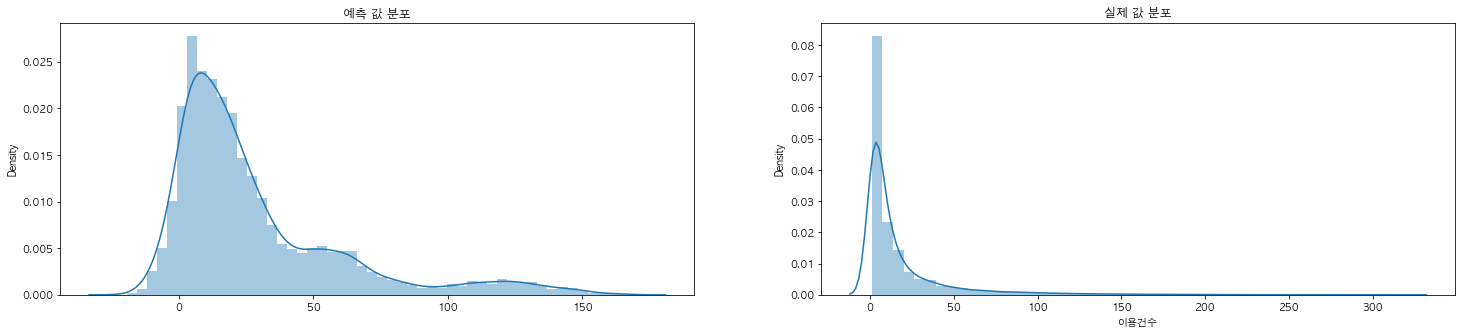

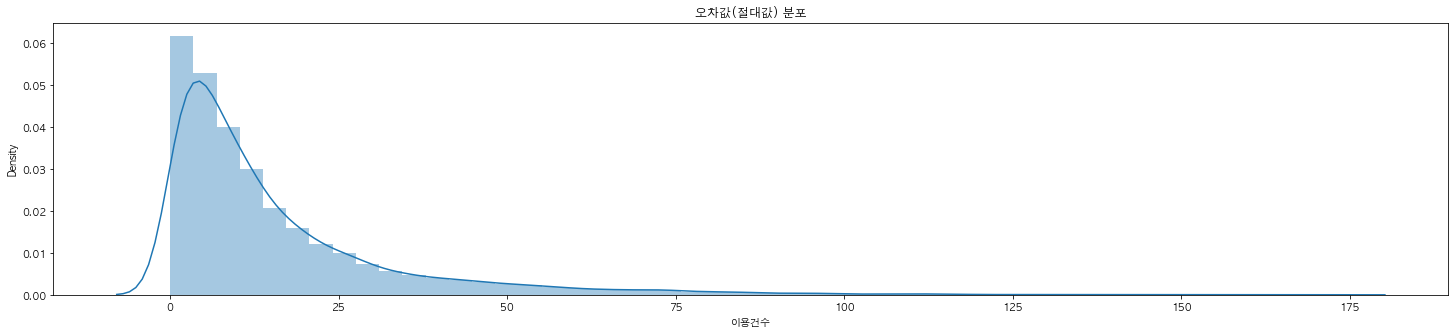

In [233]:
predictions = best_model.predict(X_test)

fig, axes = plt.subplots(1, 2, figsize=(25, 5))
sns.distplot(predictions, ax=axes[0])
axes[0].set_title("예측 값 분포")
sns.distplot(y_test, ax=axes[1])
axes[1].set_title("실제 값 분포")
plt.show()

plt.figure(figsize=(25, 5))
sns.distplot(abs(predictions - y_test))
plt.title("오차값(절대값) 분포")
plt.show()


In [234]:
row = X_test.iloc[[1000]]  # 중첩 brackets을 사용하면 결과물이 DataFrame입니다
row


,대여시간,대여월,대여일,대여요일,rent_count,이동거리,사용시간,월요일,화요일,수요일,목요일,금요일,토요일,일요일
4340,1,12,11,4,9.0,0.0,9.666667,0,0,0,0,1,0,0


In [235]:
y_test.iloc[[1000]]  # 2번째 데이터를 사용했습니다


4340    3
Name: 이용건수, dtype: int64

In [236]:
model.predict(row)


array([6.4787335], dtype=float32)

In [237]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row
)


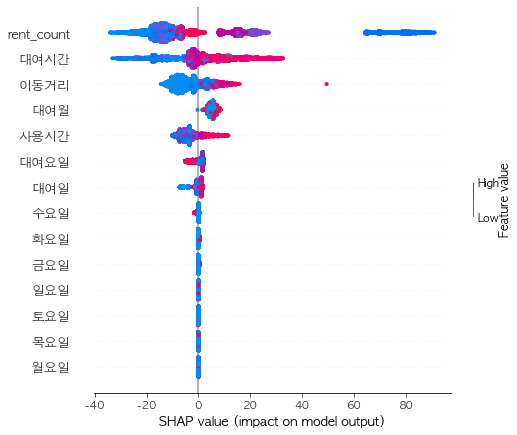

In [244]:
shap_values = explainer.shap_values(X_test.iloc[:15000])
shap.summary_plot(shap_values, X_test.iloc[:15000])

In [243]:
X_test.shape

(15814, 14)

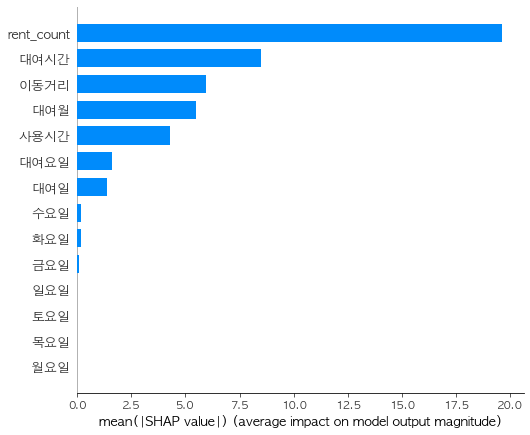

In [246]:
shap.summary_plot(shap_values, X_test.iloc[:15000], plot_type="bar")